<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/05.%20Chapter%2005/chapter_05_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5: Support Vector Machines (SVM)

Notebook ini mereproduksi dan menjelaskan isi Bab 5 dari buku _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ oleh Aurélien Géron.

Topik utama:
- Linear SVM untuk klasifikasi
- Soft margin vs hard margin
- Nonlinear SVM dengan kernel (RBF)
- SVM untuk regresi


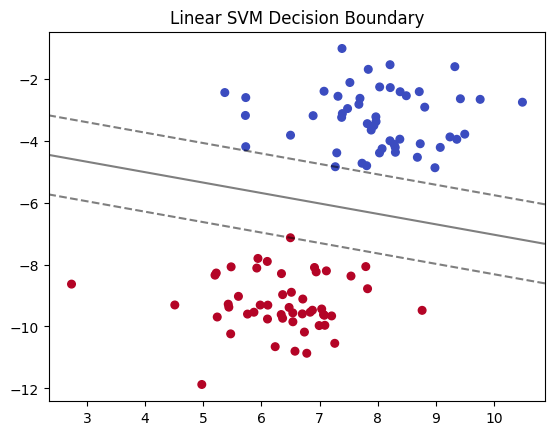

In [1]:

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Dataset 2 kelas
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# SVM linear
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

# Visualisasi decision boundary
def plot_svm_decision_boundary(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="coolwarm")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.title("Linear SVM Decision Boundary")

plot_svm_decision_boundary(svm_clf, X, y)
plt.show()


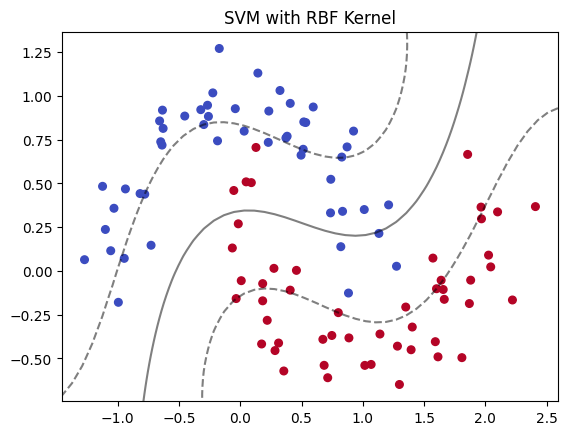

In [2]:

from sklearn.datasets import make_moons

# Nonlinear data
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

svm_rbf = SVC(kernel="rbf", C=1, gamma=0.5)
svm_rbf.fit(X_moons, y_moons)

plot_svm_decision_boundary(svm_rbf, X_moons, y_moons)
plt.title("SVM with RBF Kernel")
plt.show()


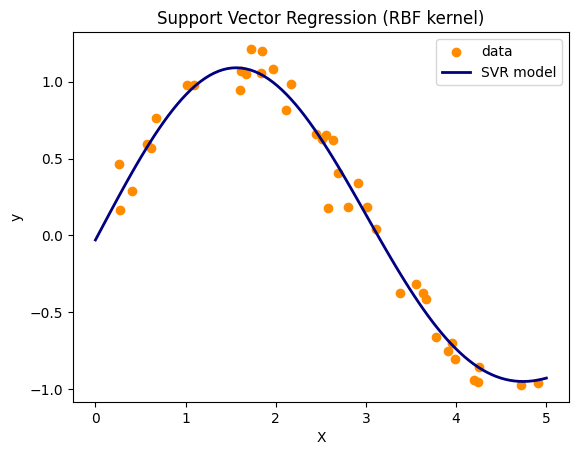

In [3]:

from sklearn.svm import SVR

# Data regresi sederhana
X_r = np.sort(5 * np.random.rand(40, 1), axis=0)
y_r = np.sin(X_r).ravel() + 0.1 * np.random.randn(40)

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_r, y_r)

X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr_rbf.predict(X_test)

plt.scatter(X_r, y_r, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR model')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression (RBF kernel)")
plt.legend()
plt.show()
